C:\Users\oskar\AppData\Local\Temp\ipykernel_28260\2127663888.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_10 = df_10.groupby('Lifetime_Bin')['Average Neighbors'].mean().reset_index()
C:\Users\oskar\AppData\Local\Temp\ipykernel_28260\2127663888.py:49: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, max_lifetime)
C:\Users\oskar\AppData\Local\Temp\ipykernel_28260\2127663888.py:50: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 100)


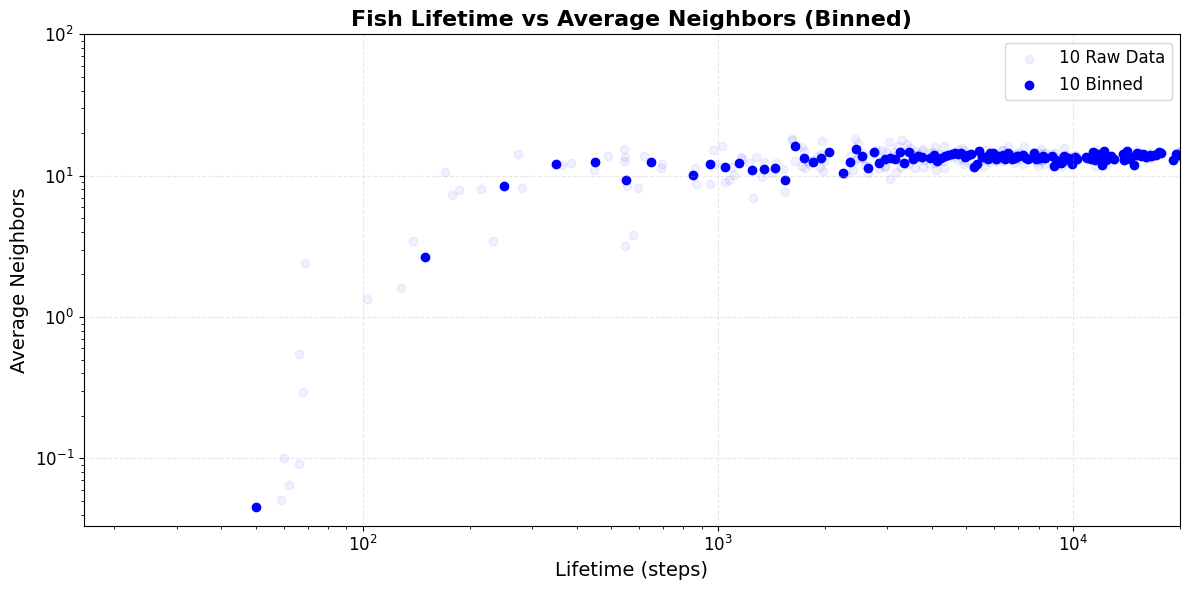

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from CSV files
df_10 = pd.read_csv('Data_1312/fish_data_1_1312.csv')


max_lifetime = df_10['Lifetime'].max()


# Define bin edges: 0, 100, 200, ..., up to the maximum 'Lifetime'
bins = np.arange(0, max_lifetime + 100, 100)  # e.g., [0, 100, 200, ..., max_lifetime]

# Assign bins to 'Lifetime' for each dataset
df_10['Lifetime_Bin'] = pd.cut(df_10['Lifetime'], bins=bins, right=False)


# Aggregate mean 'Average Neighbors' per 'Lifetime_Bin'
binned_10 = df_10.groupby('Lifetime_Bin')['Average Neighbors'].mean().reset_index()

# Calculate bin midpoints for plotting
def bin_midpoint(bin_interval):
    return bin_interval.left + (bin_interval.right - bin_interval.left) / 2

binned_10['Lifetime_Mid'] = binned_10['Lifetime_Bin'].apply(bin_midpoint)

# Create the scatter and line plot
plt.figure(figsize=(12, 6))

# Scatter plot of raw data
plt.scatter(df_10['Lifetime'], df_10['Average Neighbors'], color='blue', alpha=0.06, label='10 Raw Data')

# Line plot of binned averages
plt.scatter(binned_10['Lifetime_Mid'], binned_10['Average Neighbors'], color='blue', marker='o', label='10 Binned')


# Add titles and labels
plt.title('Fish Lifetime vs Average Neighbors (Binned)', fontsize=16, fontweight='bold')
plt.xlabel('Lifetime (steps)', fontsize=14)
plt.ylabel('Average Neighbors', fontsize=14)

# Customize ticks and grid
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0, max_lifetime)
plt.ylim(0, 100)
# Add legend
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()
